In [16]:
import numpy as np
import datetime as dt
import astropy.units as u
from tools.interpolate import interpolate_ace_data, interp_2d_ace_hux
import time
from sunpy.coordinates import frames
from astropy.coordinates import SkyCoord
from sunpy.coordinates.sun import carrington_rotation_time
from heliopy.data import ace
from HUX.hux_propagation import apply_hux_f_model
import matplotlib
import matplotlib.pyplot as plt
import astropy.constants as const
import sunpy.map
import os
import scipy
import pfsspy
import astropy
from pfsspy import tracing
from model_chain import get_ace_date, pfss2flines, distance_to_coronal_hole_boundary, run_chain_of_models
import matplotlib.dates as mdates

In [17]:
plt.rcParams['savefig.facecolor'] = 'white'
font = {'family': 'serif',
        'size': 12}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=12)
matplotlib.rc('ytick', labelsize=12)

# Read GONG maps during 02/01/2007

Observatory,NSO-GONG
Instrument,
Detector,
Measurement,676.8
Wavelength,676.8
Observation Date,2007-02-01 05:54:00
Exposure Time,Unknown
Dimension,[360. 180.] pix
Coordinate System,heliographic_carrington
Scale,[1. 0.63661914] deg / pix
Reference Pixel,[179.5 89.5] pix

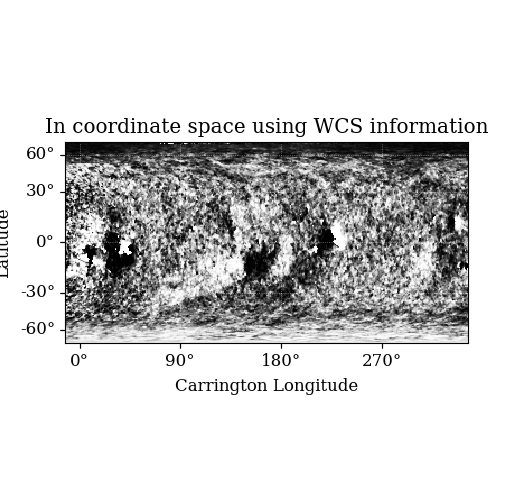
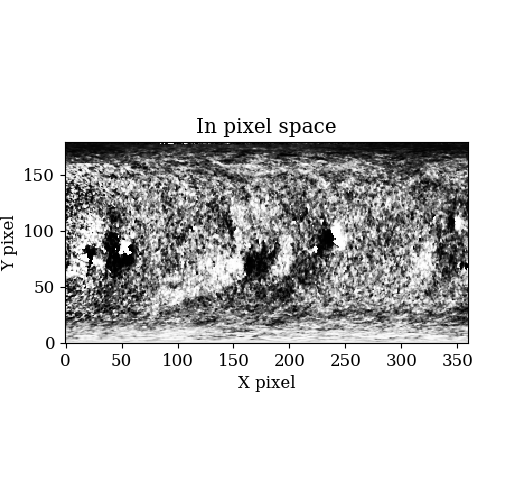
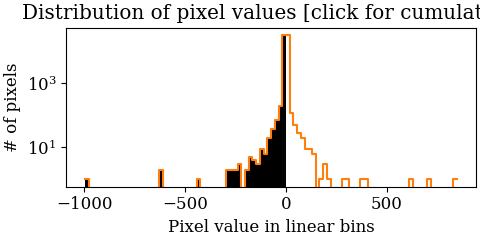
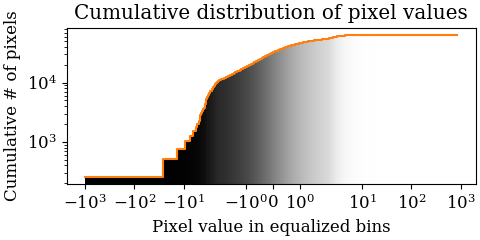

In [19]:
gong_map1 = sunpy.map.Map('GONG/CR2053_daily/1/t0554.fits.gz')
gong_map1.meta["bunit"] = "gauss"
gong_map1

Observatory,NSO-GONG
Instrument,
Detector,
Measurement,676.8
Wavelength,676.8
Observation Date,2007-02-01 11:54:00
Exposure Time,Unknown
Dimension,[360. 180.] pix
Coordinate System,heliographic_carrington
Scale,[1. 0.63661914] deg / pix
Reference Pixel,[179.5 89.5] pix

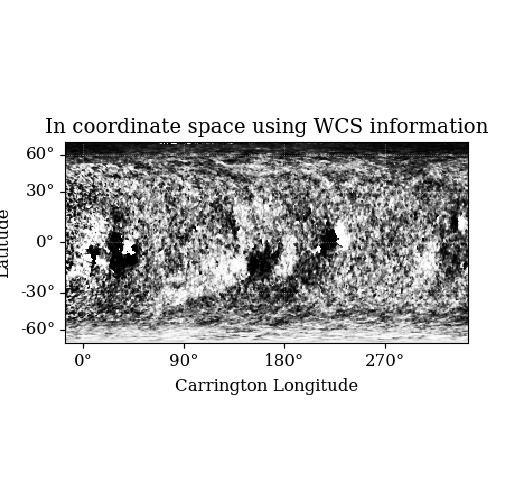
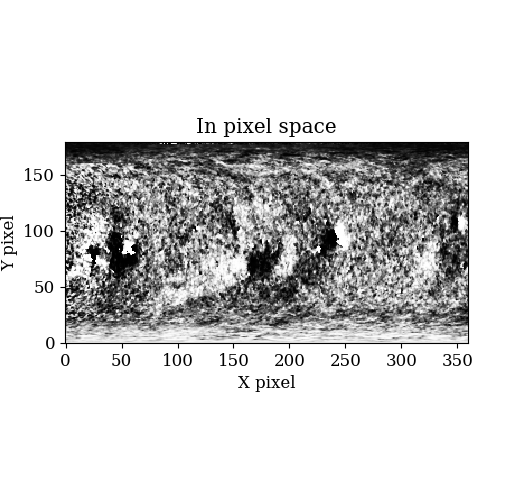
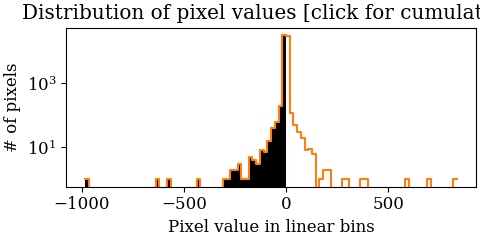
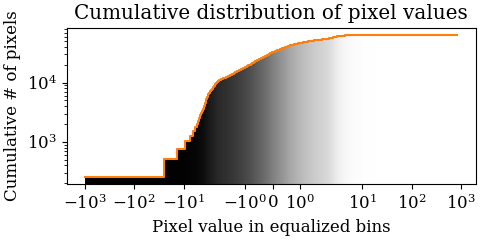

In [20]:
gong_map2 = sunpy.map.Map('GONG/CR2053_daily/1/t1154.fits.gz')
gong_map2.meta["bunit"] = "gauss"
gong_map2

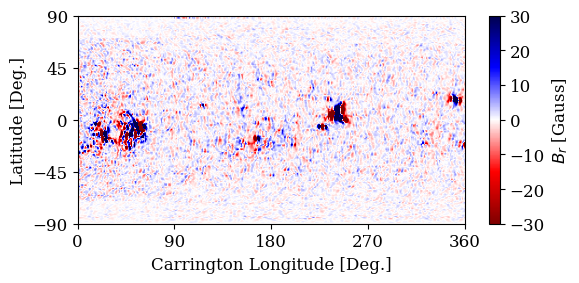

In [23]:
fig, ax = plt.subplots(figsize=(6, 3))
pos = ax.imshow(gong_map1.data - gong_map2.data, extent=[0,360,-90, 90], origin="lower", aspect="auto", cmap="seismic_r", vmin=-30, vmax=30)
ax.set_xticks([0, 90, 180, 270, 360])
ax.set_yticks([-90, -45, 0, 45, 90])
cbar = fig.colorbar(pos, ax=ax, orientation="vertical")
cbar.ax.set_ylabel(r'$B_{r}$ [Gauss]', rotation=90)
ax.set_xlim(0, 360)
ax.set_xlabel("Carrington Longitude [Deg.]")
ax.set_ylabel("Latitude [Deg.]")
plt.tight_layout()

In [29]:
gong_map1?